Implementing a basic DE solver for the neutrino winds in terms of psi

Runge-Kutta method from Wikipedia:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/25f03454fd25957cc63be11ec534efdce349c52f">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/95bdbb2e3aa83735085c0aadd577162c69e4056a">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/81398071e8f180ac143bfdf4598ff47bf79eb689">
I use $\psi$ in place of t, and {r,v} as y. I calculate separate k values for r and v to get y'={r',v'}

Questions/next steps:

Issue with RK method

Use scipy integrator to find solutions?
Use absolute value of f1,f2 and minimize the distance between their zeros as a function of v0

In [72]:
import numpy as np
import matplotlib.pyplot as plt

cs=1
M=10
G=1
mB=1
dPdS=1
Se=0
rho=1
T=1
r0=1

def ndf1(psi,coords):
    return 1-np.exp(2*coords[1])

def ndf2(psi,coords):
    return np.exp(-coords[0])*G*M/((cs**2)*r0)-2

def CoupledRungeKuttaStep(af1,af2,fn,t,dt): #takes state f(n) and steps to f(n+dt) using arbitrary input functions f1 and f2
    f1k1=dt*af1(t,fn)
    f2k1=dt*af2(t,fn)
    f1k2=dt*af1(t+dt/2,fn+np.array([f1k1/2,f2k1/2]))
    f2k2=dt*af2(t+dt/2,fn+np.array([f1k1/2,f2k1/2]))
    f1k3=dt*af1(t+dt/2,fn+np.array([f1k2/2,f2k2/2]))
    f2k3=dt*af2(t+dt/2,fn+np.array([f1k2/2,f2k2/2]))
    f1k4=dt*af1(t+dt,fn+np.array([f1k3,f2k3]))
    f2k4=dt*af2(t+dt,fn+np.array([f1k3,f2k3]))
    return np.array([t+dt,np.array([fn[0]+(f1k1+2*f1k2+2*f1k3+f1k4)/6,fn[1]+(f2k1+2*f2k2+2*f2k3+f2k4)/6])])

def generateFunc(x0,u0,itermax):
    xsol=np.array([x0])
    usol=np.array([u0])
    tarray=np.array([0])
    t=0
    dt=.01
    ddt=2
    i=0
    prevstate=0
    currState=np.array([xsol[-1],usol[-1]])
    while t<itermax and abs(ndf1(t,currState))>.001 and abs(ndf2(t,currState))>.001:
        #print(ndf1(t,currState))
        currState=np.array([xsol[-1],usol[-1]])
        step=CoupledRungeKuttaStep(ndf1,ndf2,currState,t,dt)
        #print(step)
        percentChange=100*abs(np.linalg.norm((step[1]-currState)/np.linalg.norm(currState)))
        
        #print(percentChange,dt)
        #if percentChange>1:
        #    if prevstate==2:
        #       ddt=ddt/2
        #        #dt=dt/ddt
        #        print("ddt too big")
        #        prevstate=1
        #    else:
        #        dt=dt/ddt
        #        print("dt too big")
        #        prevstate=1
        #elif percentChange<.1:
        #    if prevstate==1:
        #        ddt=ddt*2
        #        #dt=ddt*dt
        #        print("ddt too small")
        #        prevstate=2
        #    else:
        #        #dt=ddt*dt
        #        print("dt too small")
        #        prevstate=2
        #else:
        xsol=np.append(xsol,step[1][0])
        usol=np.append(usol,step[1][1])
            #print("took step")
            #prevstate=3
        t=t+dt
        tarray=np.append(tarray,t)
        i=i+1
    return np.array((tarray,xsol,usol))

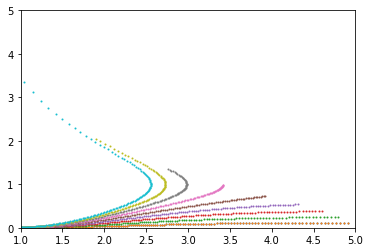

In [90]:
func=generateFunc(0,np.log(.001),1.6)
#plt.figure(1)
#plt.scatter(func[0],func[1],s=1)
#plt.figure(2)
#plt.scatter(func[0],func[2],s=1)
plt.figure(3)
plt.xlim(1,5)
plt.ylim(0,5)
plt.scatter(np.exp(func[1]),np.exp(func[2]),s=1);

it=1
for i in np.arange(.001,.01,.001):
    func=generateFunc(0,np.log(i),1.6)
    plt.scatter(np.exp(func[1]),np.exp(func[2]),s=1);

In [ ]:
plt.plot(func[1])
#print(func[1])

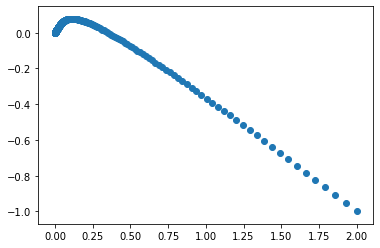

In [11]:
#Testing the CoupledRungeKuttaStep function with a known DE
#It works as expected

def testf(t,x):
    return -3*x[0]+np.sqrt(2)*x[1]
def testf2(t,x):
    return np.sqrt(2)*x[0]-2*x[1]

def generateTestFunc(x0,y0):
    x1=np.array([x0])
    x2=np.array([y0])
    t=0
    while t<10:
        step=CoupledRungeKuttaStep(testf,testf2,np.array([x1[-1],x2[-1]]),t,.01)
        x1=np.append(x1,step[1][0])
        x2=np.append(x2,step[1][1])
        t=t+.01
        #print(xstep)
    return np.array([x1,x2])

func2=generateTestFunc(2,-1)
plt.scatter(func2[0],func2[1])

In [48]:
import scipy.integrate as sc

def ndf1(psi,coords):
    return 1-np.exp(2*coords[1])

def ndf2(psi,coords):
    return np.exp(-coords[0])*G*M/((cs**2)*r0)-2

lambda t,y: (ndf1(t,y),ndf2(t,y))

sol=sc.solve_ivp(lambda t,y: (ndf1(t,y),ndf2(t,y)),(0,np.log(5)),(0,np.log(.001)))

In [49]:
sol['t']

array([0.00000000e+00, 9.99855586e-04, 1.09984114e-02, 1.10983970e-01,
       1.11083956e+00, 1.60943791e+00])

In [50]:
sol['y']

array([[ 0.00000000e+00,  9.99854578e-04,  1.09983994e-02,
         1.10983680e-01,  1.10891765e+00,  1.60151079e+00],
       [-6.90775528e+00, -6.89976143e+00, -6.82037060e+00,
        -6.07925406e+00, -2.42083165e+00, -2.11951257e+00]])

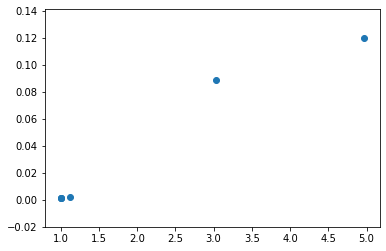

In [51]:
plt.scatter(np.exp(sol['y'][0]),np.exp(sol['y'][1]))